# **1. Perkenalan Dataset**


- Dataset Mental Health (https://www.kaggle.com/datasets/imtkaggleteam/mental-health) ini adalah sebuah data yang menampung kesehatan mental berdasarkan negara dan tahun
   

# **2. Import Library**

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

In [154]:

df = pd.read_csv("./data/health/1- mental-illnesses-prevalence.csv")

print(df.head())

print(df.columns)

        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                        

# **4. Exploratory Data Analysis (EDA)**

In [155]:

df = pd.read_csv("./data/health/1- mental-illnesses-prevalence.csv")

jumlah_baris = df.shape[0]
print(f"Jumlah baris: {jumlah_baris}")

jumlah_kolom = len(df.columns)
print("Jumlah kolom:", jumlah_kolom)

Jumlah baris: 6420
Jumlah kolom: 8


In [156]:
df = pd.read_csv("./data/health/1- mental-illnesses-prevalence.csv")

df.rename(columns={
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety disorders',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar disorders',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating disorders'
}, inplace=True)
print(df.head())

        Entity Code  Year  Schizophrenia disorders  Depressive disorders  \
0  Afghanistan  AFG  1990                 0.223206              4.996118   
1  Afghanistan  AFG  1991                 0.222454              4.989290   
2  Afghanistan  AFG  1992                 0.221751              4.981346   
3  Afghanistan  AFG  1993                 0.220987              4.976958   
4  Afghanistan  AFG  1994                 0.220183              4.977782   

   Anxiety disorders  Bipolar disorders  Eating disorders  
0           4.713314           0.703023          0.127700  
1           4.702100           0.702069          0.123256  
2           4.683743           0.700792          0.118844  
3           4.673549           0.700087          0.115089  
4           4.670810           0.699898          0.111815  


In [157]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Kolom dengan missing value:")
print(missing_columns)

Kolom dengan missing value:
Code    270
dtype: int64


In [158]:
df['Code'].fillna('Unknown', inplace=True)

C:\Users\Nico\AppData\Local\Temp\ipykernel_15500\2438077974.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Code'].fillna('Unknown', inplace=True)


In [159]:
df.loc[:, 'Code'] = df['Code'].fillna('Unknown')

In [160]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Kolom dengan missing value:")
print(missing_columns)

Kolom dengan missing value:
Series([], dtype: int64)


Visualisasi Distribusi dengan Histogram

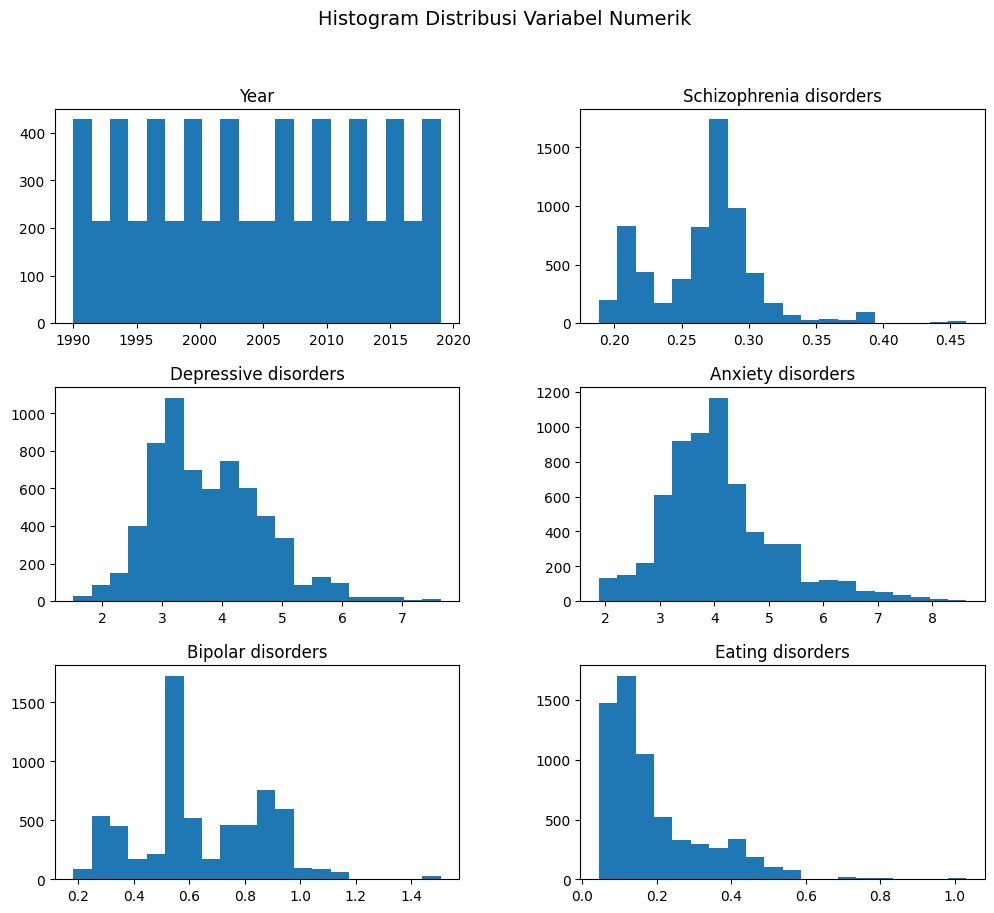

In [161]:

df.hist(figsize=(12, 10), bins=20, grid=False)

plt.suptitle("Histogram Distribusi Variabel Numerik", fontsize=14)
plt.show()

Hubungan antara variabel

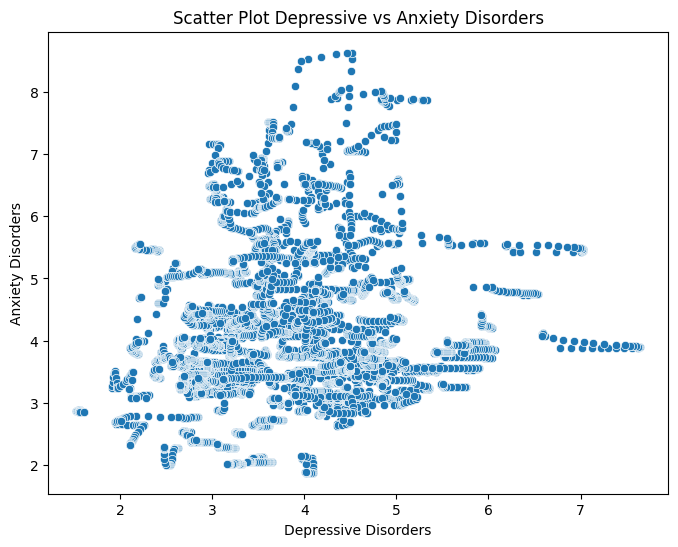

In [162]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Depressive disorders"], 
                y=df["Anxiety disorders"])
plt.xlabel("Depressive Disorders")
plt.ylabel("Anxiety Disorders")
plt.title("Scatter Plot Depressive vs Anxiety Disorders")
plt.show()

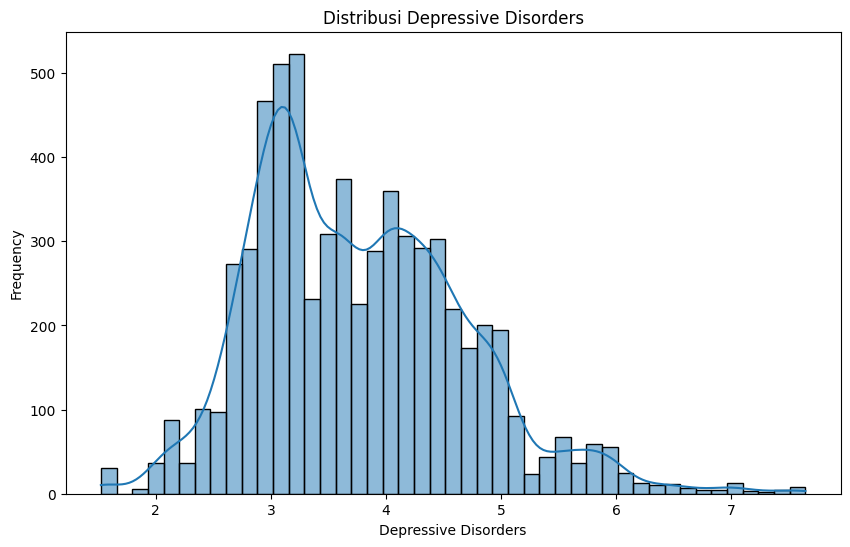

C:\Users\Nico\AppData\Local\Temp\ipykernel_15500\2341896247.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[df["Entity"].isin(top_entities)]["Entity"], order=top_entities, palette="viridis")


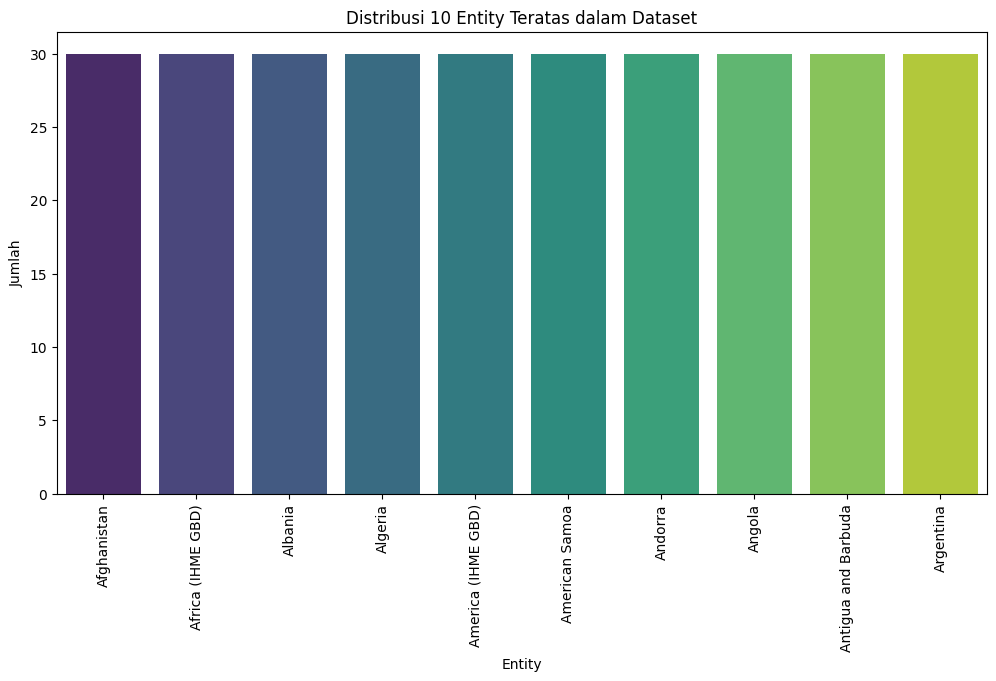

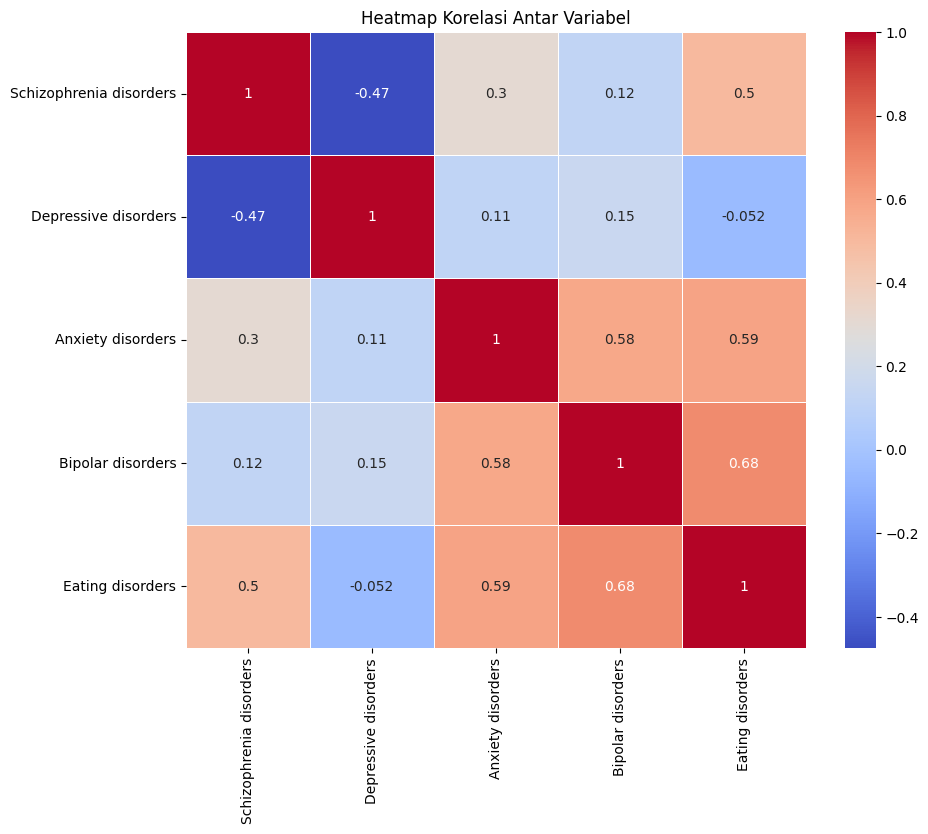

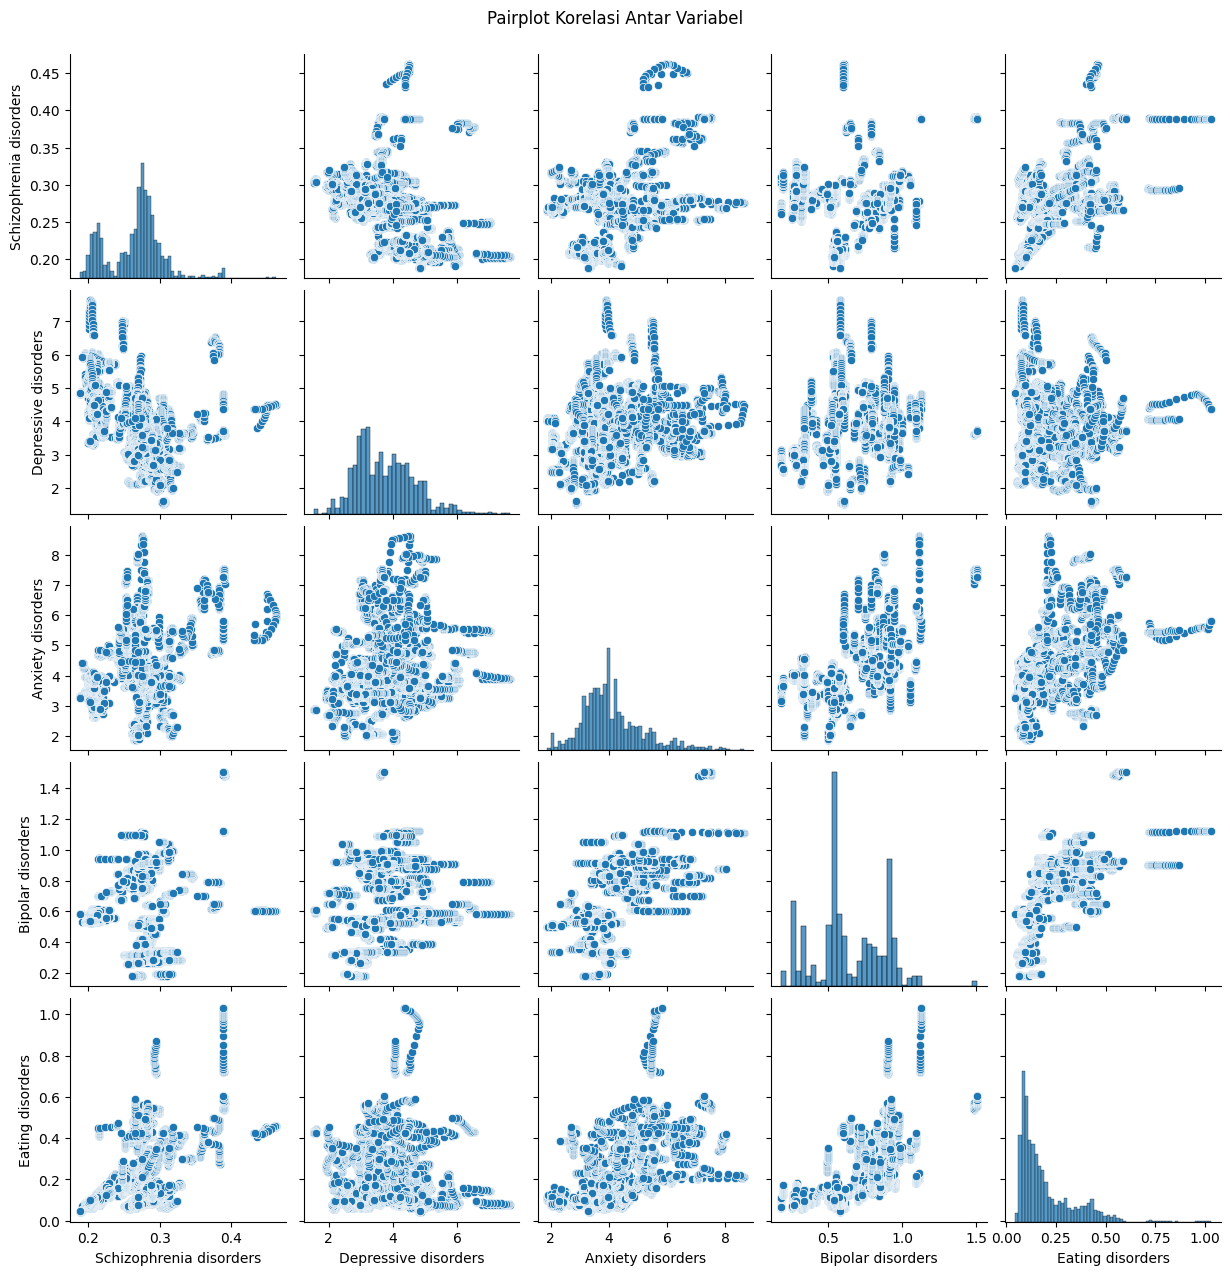

In [163]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Depressive disorders'], kde=True)
plt.title('Distribusi Depressive Disorders')
plt.xlabel('Depressive Disorders')
plt.ylabel('Frequency')
plt.show()

entity_counts = df["Entity"].value_counts()
top_entities = entity_counts.head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(x=df[df["Entity"].isin(top_entities)]["Entity"], order=top_entities, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribusi 10 Entity Teratas dalam Dataset")
plt.xlabel("Entity")
plt.ylabel("Jumlah")
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = df[['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

sns.pairplot(df[['Schizophrenia disorders', 'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders', 'Eating disorders']])
plt.suptitle('Pairplot Korelasi Antar Variabel', y=1.02)
plt.show()

# **5. Data Preprocessing**

In [164]:
print(df.isnull().sum())

Entity                     0
Code                       0
Year                       0
Schizophrenia disorders    0
Depressive disorders       0
Anxiety disorders          0
Bipolar disorders          0
Eating disorders           0
dtype: int64


In [165]:
print(f"Jumlah duplikat: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Jumlah duplikat: 0


In [166]:
import pandas as pd

data = {
    "Schizophrenia disorders": [0.223206, 0.222454, 0.221751, 0.220987, 0.220183],
    "Depressive disorders": [4.996118, 4.989290, 4.981346, 4.976958, 4.977782],
    "Anxiety disorders": [4.713314, 4.702100, 4.683743, 4.673549, 4.670810],
    "Bipolar disorders": [0.703023, 0.702069, 0.700792, 0.700087, 0.699898],
    "Eating disorders": [0.127700, 0.123256, 0.118844, 0.115089, 0.111815]
}

df = pd.DataFrame(data)

print(df.describe())


       Schizophrenia disorders  Depressive disorders  Anxiety disorders  \
count                 5.000000              5.000000           5.000000   
mean                  0.221716              4.984299           4.688703   
std                   0.001188              0.008211           0.018436   
min                   0.220183              4.976958           4.670810   
25%                   0.220987              4.977782           4.673549   
50%                   0.221751              4.981346           4.683743   
75%                   0.222454              4.989290           4.702100   
max                   0.223206              4.996118           4.713314   

       Bipolar disorders  Eating disorders  
count           5.000000          5.000000  
mean            0.701174          0.119341  
std             0.001339          0.006328  
min             0.699898          0.111815  
25%             0.700087          0.115089  
50%             0.700792          0.118844  
75%      

In [167]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_scaled.describe())

       Schizophrenia disorders  Depressive disorders  Anxiety disorders  \
count             5.000000e+00          5.000000e+00       5.000000e+00   
mean             -5.195844e-15          7.254197e-14       4.440892e-17   
std               1.118034e+00          1.118034e+00       1.118034e+00   
min              -1.442633e+00         -9.995477e-01      -1.085100e+00   
25%              -6.861255e-01         -8.873491e-01      -9.189983e-01   
50%               3.274433e-02         -4.020631e-01      -3.008021e-01   
75%               6.942175e-01          6.796184e-01       8.124241e-01   
max               1.401796e+00          1.609342e+00       1.492476e+00   

       Bipolar disorders  Eating disorders  
count       5.000000e+00      5.000000e+00  
mean       -5.559997e-14      9.769963e-16  
std         1.118034e+00      1.118034e+00  
min        -1.064981e+00     -1.329691e+00  
25%        -9.072118e-01     -7.512265e-01  
50%        -3.187095e-01     -8.777678e-02  
75%      

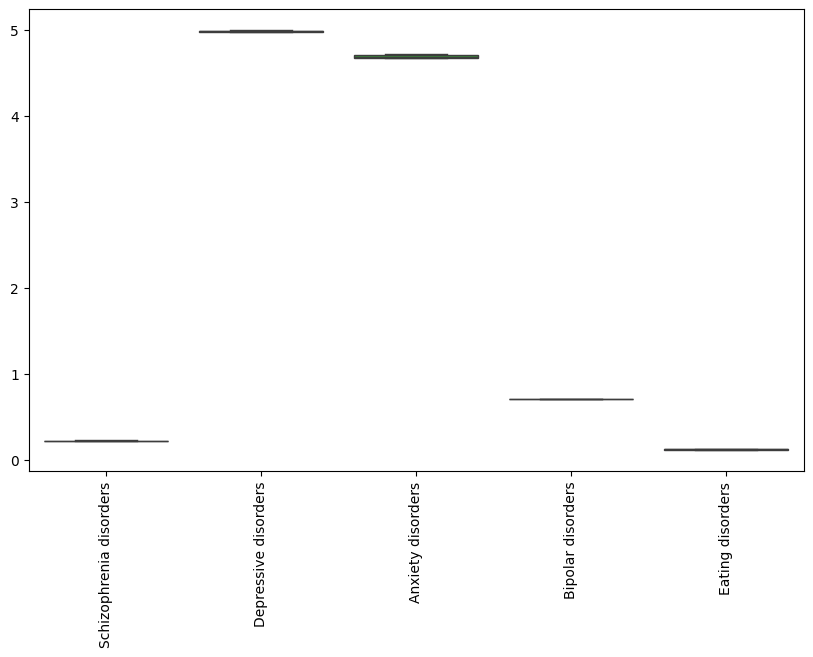

In [168]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

Menggunakan Label Encoding

In [169]:

categorical_columns = df.select_dtypes(include=['object']).columns  
print("Kolom kategorikal:", categorical_columns)

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le  

display(df.head(10)) 

Kolom kategorikal: Index([], dtype='object')


,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,0.223206,4.996118,4.713314,0.703023,0.127700
1,0.222454,4.989290,4.702100,0.702069,0.123256
2,0.221751,4.981346,4.683743,0.700792,0.118844
3,0.220987,4.976958,4.673549,0.700087,0.115089
4,0.220183,4.977782,4.670810,0.699898,0.111815


Kolom kategorikal: Index(['Entity', 'Code'], dtype='object')


C:\Users\Nico\AppData\Local\Temp\ipykernel_15500\3560892834.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Entity', 'Year']).mean().reset_index()


,Entity,Year,Code,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,0,1990-1995,0.0,0.221332,4.983287,4.685269,0.700940,0.117535
1,0,1996-2000,0.0,0.216281,4.995729,4.669890,0.699864,0.099090
2,0,2001-2005,0.0,0.214151,4.983792,4.673223,0.699691,0.095172
3,0,2006-2010,0.0,0.215028,4.954368,4.689287,0.699491,0.100895
4,0,2011-2015,0.0,0.217342,4.944733,4.765056,0.699439,0.111246
5,0,2016-2020,0.0,0.218044,4.937329,4.827762,0.699630,0.117208
6,1,1990-1995,205.0,0.219553,4.592421,3.692705,0.607074,0.109638
7,1,1996-2000,205.0,0.219181,4.623711,3.650943,0.606737,0.107570
8,1,2001-2005,205.0,0.219508,4.631933,3.614553,0.606205,0.108797
9,1,2006-2010,205.0,0.219878,4.555962,3.654438,0.605343,0.112955


C:\Users\Nico\AppData\Local\Temp\ipykernel_15500\3560892834.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[df["Entity"].isin(top_entities)]["Entity"], order=top_entities, palette="viridis")


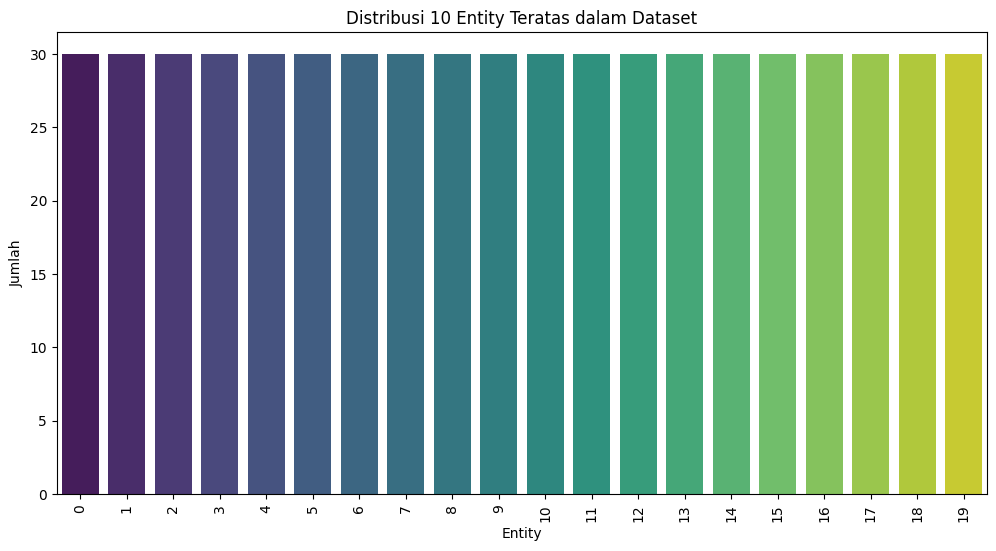

In [170]:
df = pd.read_csv("./data/health/1- mental-illnesses-prevalence.csv")
df.rename(columns={
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': 'Schizophrenia disorders',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorders',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': 'Anxiety disorders',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': 'Bipolar disorders',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': 'Eating disorders'
}, inplace=True)

categorical_columns = df.select_dtypes(include=['object']).columns 
print("Kolom kategorikal:", categorical_columns)

label_encoders = {} 
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le  


df['Year'] = pd.cut(df['Year'], bins=[1989, 1995, 2000, 2005, 2010, 2015, 2020], labels=['1990-1995', '1996-2000', '2001-2005', '2006-2010', '2011-2015', '2016-2020'])

grouped_df = df.groupby(['Entity', 'Year']).mean().reset_index()

display(grouped_df.head(10))

entity_counts = df["Entity"].value_counts()
top_entities = entity_counts.head(20).index

plt.figure(figsize=(12, 6))
sns.countplot(x=df[df["Entity"].isin(top_entities)]["Entity"], order=top_entities, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribusi 10 Entity Teratas dalam Dataset")
plt.xlabel("Entity")
plt.ylabel("Jumlah")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [ ]:

features = [
    "Schizophrenia disorders",
    "Depressive disorders",
    "Anxiety disorders",
    "Bipolar disorders",
    "Eating disorders"
]

X = df[features].values  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X_scaled)

labels = kmeans.labels_

df["Cluster"] = labels

def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        
        cluster_data = X[labels == cluster_id]

        mean_values = cluster_data.mean(axis=0) 

        print(f"\nCluster {cluster_id + 1}:")
        for i, feature in enumerate(features):
            print(f"Rata-rata {feature}: {mean_values[i]:.4f}")

analyze_clusters(X_scaled, labels, k)


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Schizophrenia disorders: 0.4717
Rata-rata Depressive disorders: -0.7436
Rata-rata Anxiety disorders: -0.5878
Rata-rata Bipolar disorders: -0.9628
Rata-rata Eating disorders: -0.4944

Cluster 2:
Rata-rata Schizophrenia disorders: 0.4453
Rata-rata Depressive disorders: -0.0446
Rata-rata Anxiety disorders: 0.8512
Rata-rata Bipolar disorders: 1.0396
Rata-rata Eating disorders: 0.9020

Cluster 3:
Rata-rata Schizophrenia disorders: -1.2663
Rata-rata Depressive disorders: 1.0466
Rata-rata Anxiety disorders: -0.4532
Rata-rata Bipolar disorders: -0.2302
Rata-rata Eating disorders: -0.6500


## **b. Evaluasi Model Clustering**

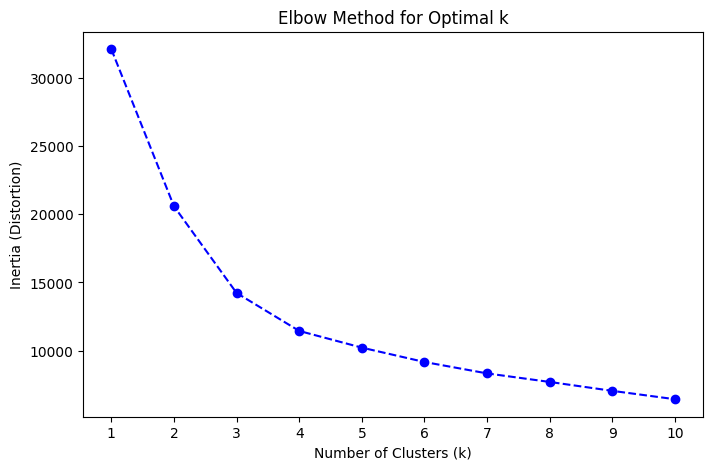

In [ ]:

features = ["Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]  
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Distortion)")
plt.title("Elbow Method for Optimal k")
plt.xticks(K_range)
plt.show()


In [189]:

from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = []
K_range = range(2, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")

Optimal number of clusters based on Silhouette Score: 3


## **d. Visualisasi Hasil Clustering**

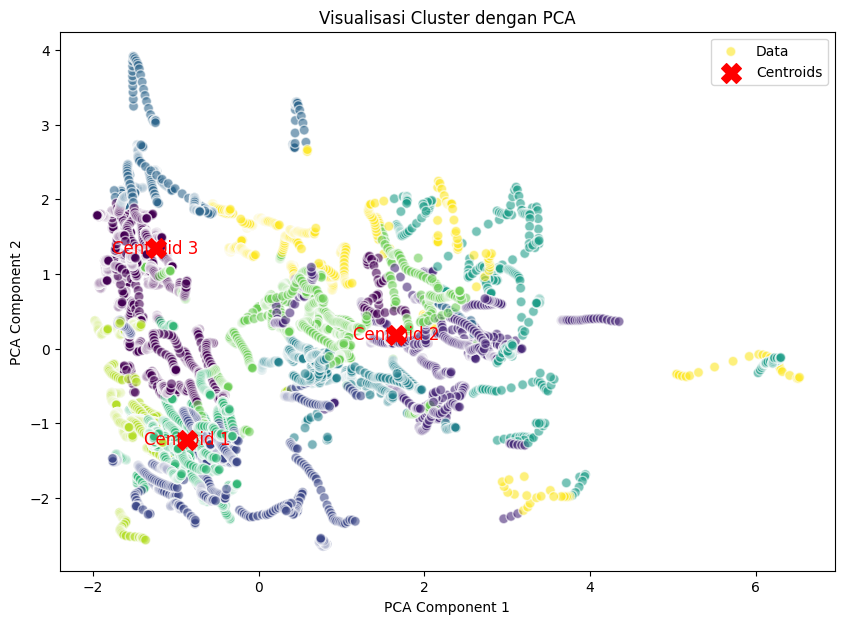

Nilai Centroids dalam PCA:
Centroid 1: PCA1 = -0.87, PCA2 = -1.22
Centroid 2: PCA1 = 1.66, PCA2 = 0.18
Centroid 3: PCA1 = -1.25, PCA2 = 1.35


In [196]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o', label="Data")

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.show()

print("Nilai Centroids dalam PCA:")
for i, centroid in enumerate(centroids_pca):
    print(f"Centroid {i+1}: PCA1 = {centroid[0]:.2f}, PCA2 = {centroid[1]:.2f}")


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [175]:
df['Cluster'] = kmeans.labels_

In [176]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Entity'] = label_encoder.fit_transform(df['Entity'])

In [177]:
model_kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = model_kmeans.fit_predict(df[['Schizophrenia disorders', 
                                             'Depressive disorders', 
                                             'Anxiety disorders', 
                                             'Bipolar disorders', 
                                             'Eating disorders']])

In [178]:
df['Entity'] = label_encoder.inverse_transform(df['Entity'])

In [179]:
print(df.head()) 

   Entity  Code       Year  Schizophrenia disorders  Depressive disorders  \
0       0     0  1990-1995                 0.223206              4.996118   
1       0     0  1990-1995                 0.222454              4.989290   
2       0     0  1990-1995                 0.221751              4.981346   
3       0     0  1990-1995                 0.220987              4.976958   
4       0     0  1990-1995                 0.220183              4.977782   

   Anxiety disorders  Bipolar disorders  Eating disorders  Cluster  
0           4.713314           0.703023          0.127700        0  
1           4.702100           0.702069          0.123256        0  
2           4.683743           0.700792          0.118844        0  
3           4.673549           0.700087          0.115089        0  
4           4.670810           0.699898          0.111815        0  


In [180]:
print(df.describe())

            Entity         Code  Schizophrenia disorders  \
count  6420.000000  6420.000000              6420.000000   
mean    106.500000   106.331776                 0.266604   
std      61.780616    61.503800                 0.039383   
min       0.000000     0.000000                 0.188416   
25%      53.000000    53.000000                 0.242267   
50%     106.500000   106.500000                 0.273477   
75%     160.000000   160.000000                 0.286575   
max     213.000000   205.000000                 0.462045   

       Depressive disorders  Anxiety disorders  Bipolar disorders  \
count           6420.000000        6420.000000        6420.000000   
mean               3.767036           4.101840           0.636968   
std                0.925286           1.050543           0.233391   
min                1.522333           1.879996           0.181667   
25%                3.080036           3.425846           0.520872   
50%                3.636772           3.93954

In [181]:
numeric_columns = df.select_dtypes(include=['number']).columns

cluster_summary = df.groupby('Cluster')[numeric_columns].agg(['mean', 'median', 'min', 'max', 'std'])
display(cluster_summary)

Entity                                   Code                  \
               mean median min  max        std        mean median min  max   
Cluster                                                                      
0        101.276018   97.0   0  212  61.696513  102.330317   97.0   0  205   
1         94.708085   91.0   4  205  57.810423   96.085106   88.0   3  205   
2        114.869193  123.0   2  213  62.183991  113.212521  120.0   2  205   

                    ... Eating disorders                                \
               std  ...             mean    median       min       max   
Cluster             ...                                                  
0        61.036827  ...         0.150645  0.109908  0.044780  0.590252   
1        61.808378  ...         0.386580  0.391205  0.145378  1.031688   
2        60.931567  ...         0.154533  0.128925  0.056217  0.531828   

                  Cluster                      
              std    mean median min max  std  
Cluster                                        
0        0.096479     0.0    0.0   0   0  0.0  
1        0.155880     1.0    1.0   1   1  0.0  
2        0.083962     2.0    2.0   2   2  0.0  

[3 rows x 40 columns]

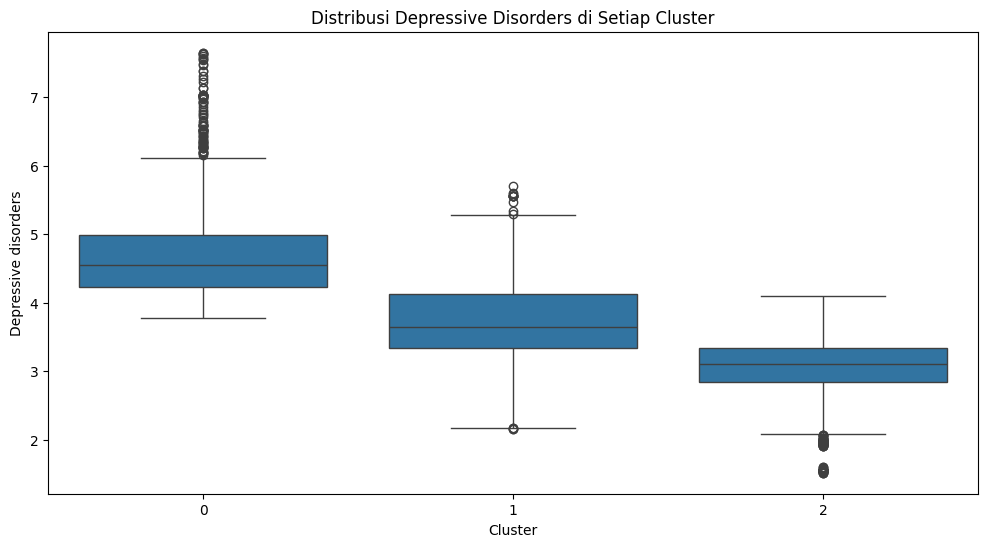

In [182]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Depressive disorders', data=df)
plt.title('Distribusi Depressive Disorders di Setiap Cluster')
plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Tahun:** 2003.92  
- **Schizophrenia Disorders:** 0.236  
- **Depressive Disorders:** Memiliki rata-rata yang paling tinggi dibanding cluster lain.
- **Eating Disorders:** 0.150
- **Analisis:** Cluster ini memiliki tingkat gangguan depresi yang paling tinggi dibanding cluster lainnya, dengan banyak data yang berada di rentang 4-6 dan beberapa outlier yang cukup signifikan di atas 6. Hal ini menunjukkan bahwa kelompok ini cenderung memiliki prevalensi gangguan depresi yang tinggi.

## Cluster 1:
- **Rata-rata Tahun:** 2004.70  
- **Schizophrenia Disorders:** 0.292 
- **Depressive Disorders:** Berada di tingkat menengah, dengan distribusi di sekitar nilai 3-5.
- **Eating Disorders:** 0.386
- **Analisis:** Cluster ini memiliki tingkat gangguan depresi yang cukup signifikan, tetapi tidak setinggi cluster 0. Menariknya, cluster ini memiliki rata-rata gangguan makan (Eating Disorders) yang paling tinggi, yang mungkin menunjukkan korelasi antara keduanya.

## Cluster 2:
- **Rata-rata Tahun:** 2004.84  
- **Schizophrenia Disorders:** 0.278 
- **Depressive Disorders:** Paling rendah dibanding cluster lainnya, dengan distribusi di sekitar nilai 2-4.
- **Eating Disorders:** 0.154
- **Analisis:** Cluster ini memiliki tingkat gangguan depresi yang lebih rendah dibandingkan dengan dua cluster lainnya. Ini bisa mengindikasikan bahwa faktor lingkungan atau populasi dalam cluster ini lebih terlindungi dari risiko gangguan depresi.

# **7. Mengeksport Data**

In [183]:
df.to_csv('Dataset_clustering.csv', index=False)